# Auswertung der Daten nach parlamentarischen Initiativen

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
import requests
from bs4 import BeautifulSoup
import PyPDF2
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from cycler import cycler
plt.rcParams.update(
    {"figure.facecolor": "#ffffff",
              "axes.facecolor": "#ffffff",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
              "grid.color"    : "ededed",
              "grid.linewidth": 0.8,
              "grid.alpha": 0.8,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "axes.spines.bottom" : False,
              "axes.axisbelow": False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              #"xtick.direction" : "none",
              "xtick.minor.size": 0,
              "xtick.major.size" : 0,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color', ['#0c2c84', '#c7e9b4', 
                                                       '#225ea8','#1d91c0', '#41b6c4', 
                                                       '#7fcdbb', '#eaea8c']),
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
import re
import time

Importiere daten


In [3]:
df = pd.read_csv('vorstoesse_2018_12_17.csv')
df.head()

,beteiligte,geschaeft,name,nr,year
0,"Hammer Fritz, Erstunterzeichner(in)",Geschäftsart: Einzelinitiative\nZugeteilt an: ...,377/2018\nVelosteuer,377,2018
1,"Meier Linus, Erstunterzeichner(in)",Geschäftsart: Einzelinitiative\nZugeteilt an: ...,378/2018\nMehr in junge Schweizer Berufskräfte...,378,2018
2,"Sahli Manuel (AL, Winterthur), Erstunterzeichn...",Geschäftsart: Motion\nZugeteilt an: keine\nDir...,379/2018\nShared Mobility mit Autostopp-Haltes...,379,2018
3,"Mäder Jörg (GLP, Opfikon), Erstunterzeichner(i...",Geschäftsart: Motion\nZugeteilt an: keine\nDir...,380/2018\nÜbertragung der Ratsdebatten,380,2018
4,"Marti Sibylle (SP, Zürich), Erstunterzeichner(...",Geschäftsart: Postulat\nZugeteilt an: keine\nD...,381/2018\nBekämpfung von Kinderarmut im Kanton...,381,2018


In [4]:
#kreiere spalte für namen
df['g_name'] = df.name.str.extract('\d*\d*\d*\d/\d\d\d\d\n(.*)')

In [5]:
#kreire spalte für geschäftsnummer
df['g_nr'] = df.name.str.extract('(\d*\d*\d*\d/\d\d\d\d)')

In [7]:
#kreire spalte für 
df['g_art'] = df.geschaeft.str.extract('Geschäftsart:(.*)\n')
df.head()

,beteiligte,geschaeft,name,nr,year,g_name,g_nr,g_art
0,"Hammer Fritz, Erstunterzeichner(in)",Geschäftsart: Einzelinitiative\nZugeteilt an: ...,377/2018\nVelosteuer,377,2018,Velosteuer,377/2018,Einzelinitiative
1,"Meier Linus, Erstunterzeichner(in)",Geschäftsart: Einzelinitiative\nZugeteilt an: ...,378/2018\nMehr in junge Schweizer Berufskräfte...,378,2018,Mehr in junge Schweizer Berufskräfte investieren,378/2018,Einzelinitiative
2,"Sahli Manuel (AL, Winterthur), Erstunterzeichn...",Geschäftsart: Motion\nZugeteilt an: keine\nDir...,379/2018\nShared Mobility mit Autostopp-Haltes...,379,2018,Shared Mobility mit Autostopp-Haltestellen,379/2018,Motion
3,"Mäder Jörg (GLP, Opfikon), Erstunterzeichner(i...",Geschäftsart: Motion\nZugeteilt an: keine\nDir...,380/2018\nÜbertragung der Ratsdebatten,380,2018,Übertragung der Ratsdebatten,380/2018,Motion
4,"Marti Sibylle (SP, Zürich), Erstunterzeichner(...",Geschäftsart: Postulat\nZugeteilt an: keine\nD...,381/2018\nBekämpfung von Kinderarmut im Kanton...,381,2018,Bekämpfung von Kinderarmut im Kanton Zürich,381/2018,Postulat


In [8]:
#extrahiere die Erstunterzeichner der Vorstösse
df['g_erst'] = df.beteiligte.str.extract('(.*), Erstunterzeichner')


In [9]:
#extrahiere die Partei der Erstunterzeichner
df['g_partei'] = df.g_erst.str.extract('(\w*), ')
df.head()

,beteiligte,geschaeft,name,nr,year,g_name,g_nr,g_art,g_erst,g_partei
0,"Hammer Fritz, Erstunterzeichner(in)",Geschäftsart: Einzelinitiative\nZugeteilt an: ...,377/2018\nVelosteuer,377,2018,Velosteuer,377/2018,Einzelinitiative,Hammer Fritz,NaN
1,"Meier Linus, Erstunterzeichner(in)",Geschäftsart: Einzelinitiative\nZugeteilt an: ...,378/2018\nMehr in junge Schweizer Berufskräfte...,378,2018,Mehr in junge Schweizer Berufskräfte investieren,378/2018,Einzelinitiative,Meier Linus,NaN
2,"Sahli Manuel (AL, Winterthur), Erstunterzeichn...",Geschäftsart: Motion\nZugeteilt an: keine\nDir...,379/2018\nShared Mobility mit Autostopp-Haltes...,379,2018,Shared Mobility mit Autostopp-Haltestellen,379/2018,Motion,"Sahli Manuel (AL, Winterthur)",AL
3,"Mäder Jörg (GLP, Opfikon), Erstunterzeichner(i...",Geschäftsart: Motion\nZugeteilt an: keine\nDir...,380/2018\nÜbertragung der Ratsdebatten,380,2018,Übertragung der Ratsdebatten,380/2018,Motion,"Mäder Jörg (GLP, Opfikon)",GLP
4,"Marti Sibylle (SP, Zürich), Erstunterzeichner(...",Geschäftsart: Postulat\nZugeteilt an: keine\nD...,381/2018\nBekämpfung von Kinderarmut im Kanton...,381,2018,Bekämpfung von Kinderarmut im Kanton Zürich,381/2018,Postulat,"Marti Sibylle (SP, Zürich)",SP


Wie hat sich die Zahl der PI entwickelt?

In [10]:
pi = df[df['g_art']==' Parlamentarische Initiative']

In [12]:
pi_peryear = pi[['year','g_art','beteiligte']].groupby(['year','g_art']).count().reset_index()
pi_peryear.to_csv('pi_projahr.csv', index=False)
pi_peryear

,year,g_art,beteiligte
0,1987,Parlamentarische Initiative,12
1,1988,Parlamentarische Initiative,7
2,1989,Parlamentarische Initiative,1
3,1990,Parlamentarische Initiative,3
4,1991,Parlamentarische Initiative,4
5,1992,Parlamentarische Initiative,5
6,1993,Parlamentarische Initiative,7
7,1994,Parlamentarische Initiative,10
8,1995,Parlamentarische Initiative,6
9,1996,Parlamentarische Initiative,6


Welche Partei hat wie viele PIs eingereicht seit 2015?

In [13]:
df2015 = df[df['year']>2014]

In [14]:
pi_perparty_2015 = df2015[['g_partei','g_art','g_nr']][df2015['g_art']==' Parlamentarische Initiative'].groupby(['g_partei','g_art']).count().sort_values(['g_art','g_nr'], ascending=False).reset_index()
pi_perparty_2015.to_csv('pi_propartei_2015.csv', index=False)
pi_perparty_2015.head()

,g_partei,g_art,g_nr
0,SVP,Parlamentarische Initiative,33
1,FDP,Parlamentarische Initiative,17
2,SP,Parlamentarische Initiative,15
3,Grüne,Parlamentarische Initiative,9
4,GLP,Parlamentarische Initiative,6


Wer hat am meisten PIs eingereicht?

In [15]:
pi_perperson_2015 = df2015[['g_erst','g_art','g_nr']][df2015['g_art']==' Parlamentarische Initiative'].groupby(['g_erst','g_art']).count().sort_values(['g_art','g_nr'], ascending=False).reset_index()
pi_perperson_2015.to_csv('pi_properson_2015.csv', index=False)
pi_perperson_2015.head(10)

,g_erst,g_art,g_nr
0,"Schmid Claudio (SVP, Bülach)",Parlamentarische Initiative,6
1,"Amrein Hans-Peter (SVP, Küsnacht)",Parlamentarische Initiative,4
2,"Hoffmann Benedikt (SVP, Zürich)",Parlamentarische Initiative,4
3,Kantonsrat Geschäftsleitung,Parlamentarische Initiative,4
4,"Langhart Konrad (SVP, Oberstammheim)",Parlamentarische Initiative,4
5,"Marty Maria Rita (EDU, Volketswil)",Parlamentarische Initiative,4
6,"Gantner Alex (FDP, Maur)",Parlamentarische Initiative,3
7,"Kommission für Energie, Verkehr und Umwelt",Parlamentarische Initiative,3
8,"Schmid Stefan (SVP, Niederglatt)",Parlamentarische Initiative,3
9,"Bourgeois Marc (FDP, Zürich)",Parlamentarische Initiative,2


Wer hat am meisten im Jahr 2018 eingereicht?

In [16]:
df2018 = df[df['year']>2017]

In [17]:
pi_perperson_2018 = df2018[['g_erst','g_art','g_nr']][df2018['g_art']==' Parlamentarische Initiative'].groupby(['g_erst','g_art']).count().sort_values(['g_art','g_nr'], ascending=False).reset_index()
pi_perperson_2018.head()

,g_erst,g_art,g_nr
0,"Schmid Claudio (SVP, Bülach)",Parlamentarische Initiative,5
1,"Marty Maria Rita (EDU, Volketswil)",Parlamentarische Initiative,4
2,"Amrein Hans-Peter (SVP, Küsnacht)",Parlamentarische Initiative,3
3,"Langhart Konrad (SVP, Oberstammheim)",Parlamentarische Initiative,3
4,"Schmid Stefan (SVP, Niederglatt)",Parlamentarische Initiative,3


Wer macht allgemein am meisten Vorstösse?

In [19]:
perperson2015 = df2015[['g_erst','g_nr']].groupby(['g_erst']).count().sort_values(['g_nr'], ascending=False).reset_index()
perperson2015.head(13)

,g_erst,g_nr
0,Interfraktionelle Konferenz Kantonsrat Zürich,117
1,"Amrein Hans-Peter (SVP, Küsnacht)",51
2,"Egli Hans (EDU, Steinmaur)",35
3,"Schmid Stefan (SVP, Niederglatt)",23
4,Kantonsrat Geschäftsleitung,23
5,"Wicki Monika (SP, Zürich)",23
6,"Brunner Robert (Grüne, Steinmaur)",22
7,"Schmid Claudio (SVP, Bülach)",21
8,"Farner Martin (FDP, Oberstammheim)",20
9,"Dünki-Bättig Michèle (SP, Glattfelden)",20


In [20]:
#welche partei hat insgesamt am meisten Vorstösse eingereicht
df2015[['g_partei','g_nr']].groupby(['g_partei']).count().sort_values(['g_nr'], ascending=False).reset_index().head()

,g_partei,g_nr
0,SVP,330
1,SP,234
2,FDP,207
3,Grüne,132
4,GLP,109


Export die PIs ab 2015

In [30]:
pi_name_2015 = df2015[['g_erst','g_art','g_nr', 'g_name']][df2015['g_art']==' Parlamentarische Initiative']
pi_name_2015.to_csv('pi_name_2015.csv', index=False)
pi_name_2015.head()

,g_erst,g_art,g_nr,g_name
5,"Pfalzgraf Hannah (SP, Mettmenstetten)",Parlamentarische Initiative,382/2018,"Bürgerrecht, schnellere Integration dank tiefe..."
21,"Schmid Claudio (SVP, Bülach)",Parlamentarische Initiative,368/2018,Sozialdetektive sollen neu auf GPS-Tracker zur...
29,"Amrein Hans-Peter (SVP, Küsnacht)",Parlamentarische Initiative,359/2018,Unterhalt von Beförderungsanlagen
30,"Berger Antoine (FDP, Kilchberg)",Parlamentarische Initiative,358/2018,Grünflächenbonus
31,"Steiner Kathy (Grüne, Zürich)",Parlamentarische Initiative,357/2018,Standesinitiative zur Kompetenzübertragung an ...


Vorstösse pro Partei nach Art (ab 2015)

In [21]:
perparty_2015 = df2015[['g_partei','g_art','g_nr']].groupby(['g_partei','g_art']).count().sort_values(['g_art','g_nr'], ascending=False).reset_index()
perparty_2015.to_csv('perparty_2015.csv', index=False)

In [22]:
perparty_2015.to_csv('pi_proparty_2015.csv', index=False)
perparty_2015.head(15)

,g_partei,g_art,g_nr
0,FDP,Postulat,31
1,GLP,Postulat,31
2,SP,Postulat,31
3,Grüne,Postulat,15
4,SVP,Postulat,13
5,EVP,Postulat,9
6,CVP,Postulat,6
7,BDP,Postulat,3
8,AL,Postulat,2
9,SVP,Parlamentarische Initiative,33


Aussage von Thomas Vogel überprüfen: «Ich habe das Gefühl, die Räte brauchen nur noch Anfragen und parlamentarische Initiativen, also das schwächste und das stärkste Mittel der Parlamentarier»

In [79]:
all_peryear = df[['year','g_art','beteiligte']].groupby(['year','g_art']).count().unstack().reset_index()
all_peryear.set_index('year', inplace=True)
all_peryear.head()

beteiligte                                                    \
g_art    Anfrage  Behördeninitiative  Diverses  Dringliche Anfrage   
year                                                                 
1987       106.0                 3.0       NaN                 NaN   
1988       134.0                 2.0       NaN                 NaN   
1989       140.0                 3.0       NaN                 NaN   
1990       158.0                 1.0       NaN                 NaN   
1991       130.0                 4.0       NaN                 NaN   

                                                                          \
g_art  Dringliche Interpellation  Dringliches Postulat  Einzelinitiative   
year                                                                       
1987                         2.0                   NaN              28.0   
1988                         1.0                   NaN              25.0   
1989                         6.0                   NaN              13.0   
1990                         3.0                   NaN              26.0   
1991                         5.0                   NaN              26.0   

                                                                  \
g_art  Geschäftsbericht  Interpellation  Leistungsmotion  Motion   
year                                                               
1987                NaN            29.0              NaN    45.0   
1988                NaN            38.0              NaN    36.0   
1989                NaN            28.0              NaN    48.0   
1990                NaN            16.0              NaN    29.0   
1991                NaN            23.0              NaN    39.0   

                                                                              
g_art  Parlamentarische Initiative  Postulat  Volksinitiative  Vorlage  Wahl  
year                                                                          
1987                          12.0      60.0              5.0      NaN   NaN  
1988                           7.0      69.0              6.0      NaN   NaN  
1989                           1.0      82.0              3.0      NaN   NaN  
1990                           3.0      96.0              1.0      NaN   NaN  
1991                           4.0      52.0              4.0      NaN   NaN

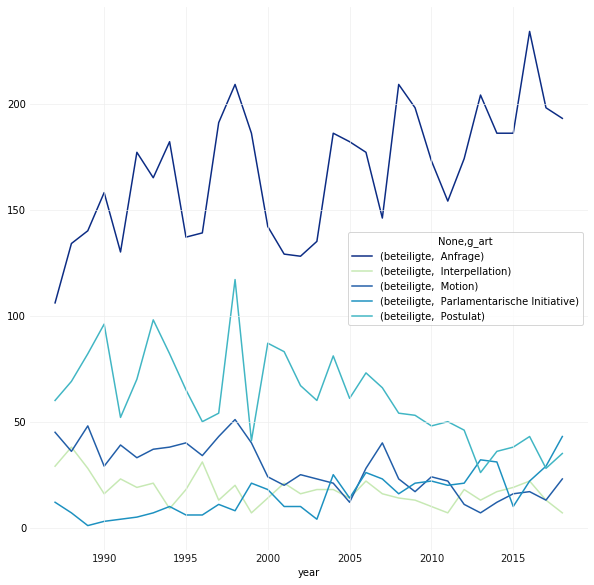

In [78]:
all_peryear.iloc[:,[0,8,10,11,12]].plot(kind='line', figsize=(10, 10)) #mit Anfrage

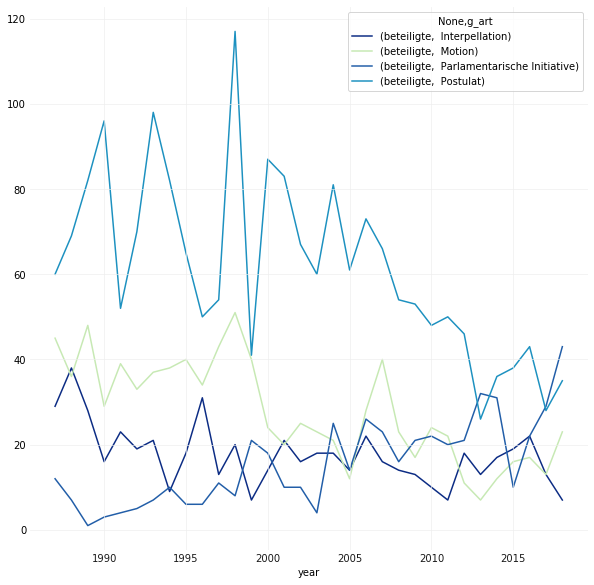

In [80]:
all_peryear.iloc[:,[8,10,11,12]].plot(kind='line', figsize=(10, 10)) #ohne Anfrage

tatsächlich haben die meisten Vorstossarten deutlich abgenommen. Besonders auffällig Postulat. War sonst in den Jahren vor Wahlen äusserst beliebt.

#### Quick and dirty Grafiken als PDFs exportierne für Infografik-Team

0
Rectangle(xy=(-0.25, 0), width=0.5, height=12, angle=0)
1
Rectangle(xy=(0.75, 0), width=0.5, height=7, angle=0)
2
Rectangle(xy=(1.75, 0), width=0.5, height=1, angle=0)
3
Rectangle(xy=(2.75, 0), width=0.5, height=3, angle=0)
4
Rectangle(xy=(3.75, 0), width=0.5, height=4, angle=0)
5
Rectangle(xy=(4.75, 0), width=0.5, height=5, angle=0)
6
Rectangle(xy=(5.75, 0), width=0.5, height=7, angle=0)
7
Rectangle(xy=(6.75, 0), width=0.5, height=10, angle=0)
8
Rectangle(xy=(7.75, 0), width=0.5, height=6, angle=0)
9
Rectangle(xy=(8.75, 0), width=0.5, height=6, angle=0)
10
Rectangle(xy=(9.75, 0), width=0.5, height=11, angle=0)
11
Rectangle(xy=(10.75, 0), width=0.5, height=8, angle=0)
12
Rectangle(xy=(11.75, 0), width=0.5, height=21, angle=0)
13
Rectangle(xy=(12.75, 0), width=0.5, height=18, angle=0)
14
Rectangle(xy=(13.75, 0), width=0.5, height=10, angle=0)
15
Rectangle(xy=(14.75, 0), width=0.5, height=10, angle=0)
16
Rectangle(xy=(15.75, 0), width=0.5, height=4, angle=0)
17
Rectangle(xy=(16.75, 0),

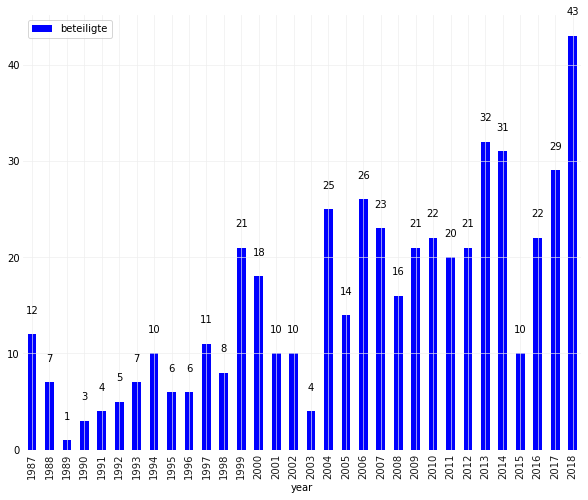

In [121]:
ax = pi_peryear[['year','beteiligte']].plot(x='year', y='beteiligte',kind='bar', color='blue', figsize=(10,8))

for i, bar in enumerate(ax.patches):
    print(i)
    print(bar)
    value = bar.get_height()
    x_pos = i
    y_pos = bar.get_height() + 3
    ax.text(x_pos, y_pos, round(value,1), ha='center', va='top', color='black')
    

# then we save it
plt.savefig("bar_PIs.pdf")
plt.show()

In [117]:
party_plot = pd.concat([pi_perparty_2015[0:7],pi_perparty_2015[8:]])

0
Rectangle(xy=(-0.25, 0), width=0.5, height=33, angle=0)
1
Rectangle(xy=(0.75, 0), width=0.5, height=17, angle=0)
2
Rectangle(xy=(1.75, 0), width=0.5, height=15, angle=0)
3
Rectangle(xy=(2.75, 0), width=0.5, height=9, angle=0)
4
Rectangle(xy=(3.75, 0), width=0.5, height=6, angle=0)


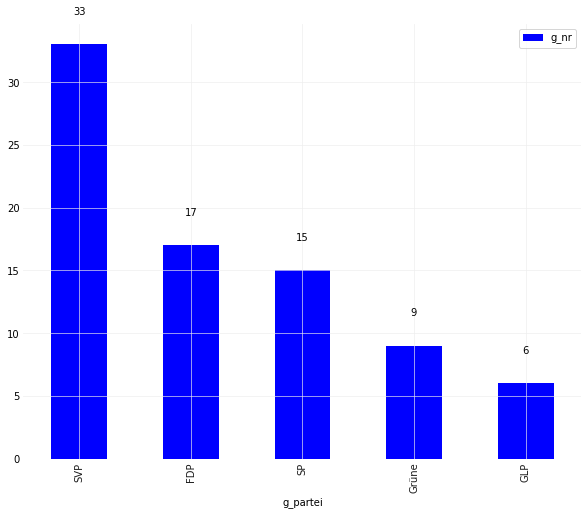

In [122]:
ax = party_plot[['g_partei','g_nr']].head().plot(x='g_partei', y='g_nr',kind='bar', color='blue', figsize=(10,8))

for i, bar in enumerate(ax.patches):
    print(i)
    print(bar)
    value = bar.get_height()
    x_pos = i
    y_pos = bar.get_height() + 3
    ax.text(x_pos, y_pos, round(value,1), ha='center', va='top', color='black')
    

# then we save it
plt.savefig("bar_PIs_partei.pdf")
plt.show()